In [31]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with conda or pip  and then try again.")
    sys.exit()

from sklearn import ensemble
import kmapper as km
from kmapper.plotlyviz import *
from sklearn.decomposition import PCA
from kmapper import jupyter

import warnings
warnings.filterwarnings("ignore")

In this notebook we recreate some of the Mapper graphs presented in the paper https://arxiv.org/pdf/1904.11044.pdf

In [67]:
def objtxtToArray(fileName):
    #first open the file and sift through all the header lines
    file = open(fileName, "r")
    line = "not v"
    while(line[0] != "v"):
        line = file.readline()
    
    #The 3d coordinates have a header of 'v'. So, all the lines with v can then be taken and split in order to get coords
    x = []
    y = []
    z = []
    while(line[0] == "v"):
        temp = line.split()
        x.append(float(temp[1]))
        y.append(float(temp[2]))
        z.append(float(temp[3]))
        line = file.readline()
    
    #x, y, and z are easily collated to give 3d vectors to the points
    coords = np.stack([x, y, z], axis = 1)
    
    return coords

In [3]:
data = objtxtToArray("alienData(txt).txt")

In [68]:
data.shape

(14098, 3)

In the paper, all 3D objects were standardised to have height 1 in $\mathbb{R}^3$

In [171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
#print(scaler.data_max_)
data = scaler.transform(data)

[1. 1. 1.]


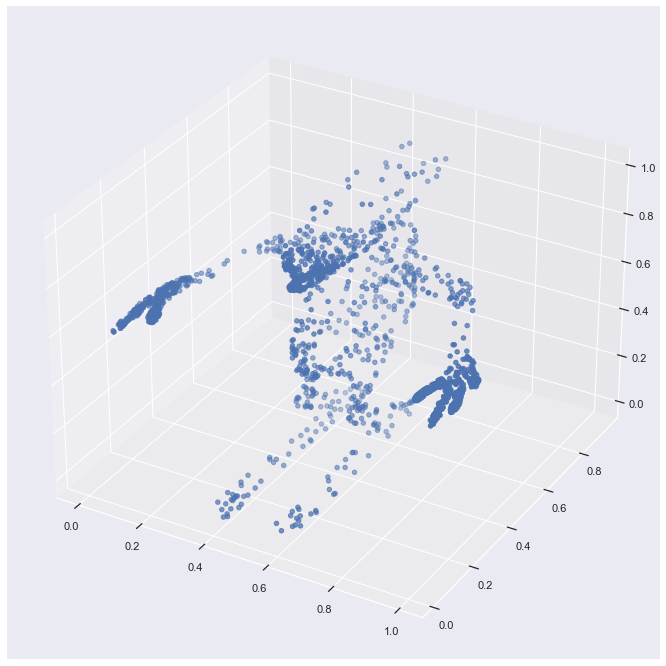

In [188]:
random_rows = np.random.choice(data.shape[0], 1500, replace = False)
sample = data[random_rows, :]
sample.shape

#plotting the data to get the alien
x = sample[:,0]
y = sample[:,1]
z = sample[:,2]

fig = plt.figure(figsize = (20,12))
#ax = plt.axes(projection="3d")
#ax.scatter(x, y, z, 'grey')


ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z)

plt.show()

In [134]:
import kmapper as km
from kmapper import jupyter
import networkx as nx

The paper uses the method of connected components of the $\epsilon$-neighbouring graph. I think this is DBSCAN

In [95]:
from sklearn.cluster import DBSCAN

In [193]:
#initiate the mapper object and lens the first two coordinates
mapper = km.KeplerMapper(verbose = 0)
lens = mapper.fit_transform(sample, projection = [2])


# Define the simplicial complex using different parameters like lens, cover, and clusterer
scomplex = mapper.map(lens,
                      sample,
                      cover=km.Cover(n_cubes=5, perc_overlap=0.3),
                      clusterer=sklearn.cluster.DBSCAN(eps = .11))

# Visualize it
html = mapper.visualize(scomplex, 
                        color_values=lens,
                        color_function_name = 'height',
                        node_color_function = 'mean', 
                        path_html="alien.html",
                        title="Alien")

# Inline display
# jupyter.display(path_html="http://mlwave.github.io/tda/word2vec-gender-bias.html")
jupyter.display(path_html="alien.html")

In [194]:
lens

array([[0.19203321],
       [0.54594542],
       [0.56019619],
       ...,
       [0.43748874],
       [0.94098608],
       [0.53441734]])